# Convolutional Neural Network (CNN)


Convolutional Neural Networks (CNNs) are a class of deep neural networks commonly used in `image recognition` and `processing`. When discussing CNNs, several key terms and concepts come into play:

 - **Convolutional Layer:** This layer applies convolutional operations to the input, producing feature maps. It is the core building block of a CNN.
    - **Convolutional Operation:** This operation involves a `kernel` (or `filter`) that is passed over the input data, performing element-wise multiplication with the part of the input it is currently `focused` on. The result is a single value in the output feature map.


## NOTE:

`DIMENSION OF ALL IMAGES SHOULD BE SAME:`

`i.e; it should be  28*28 or 56*56 for all images`

`And if dimension of all images is not same means 1 image is 28*28 and other is 56*56 then convert all images to 28*28 first`

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

2025-09-21 21:21:50.418575: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-21 21:21:50.419121: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-21 21:21:50.421334: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-21 21:21:50.427861: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758471710.438772  411146 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758471710.44

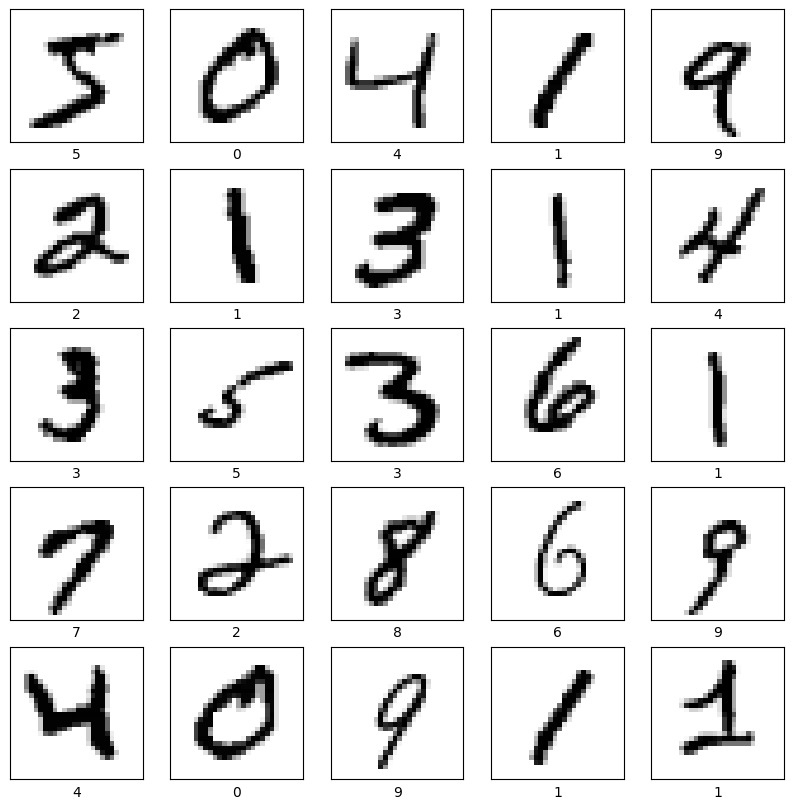

In [2]:
# Display some sample images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary) # display image in grayscale
    plt.xlabel(y_train[i])
plt.show()

In [3]:
# explore the data
print(f"We have {len(X_train)} images in the training set and {len(X_test)} images in the test set.")
print(f"The size of an image is {X_train[0].shape}.")

We have 60000 images in the training set and 10000 images in the test set.
The size of an image is (28, 28).


In [4]:
X_train.shape # (60000, 28, 28) --> total of 60000 images, each of size 28x28 pixels - no color channels here

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

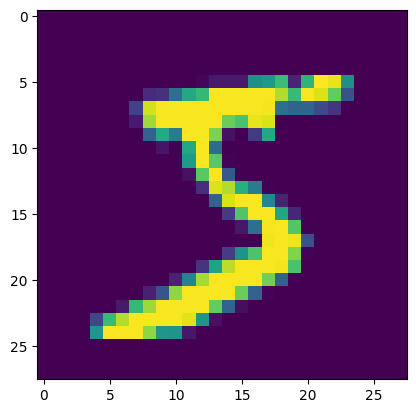

In [7]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0]) # cmap=plt.cm.binary

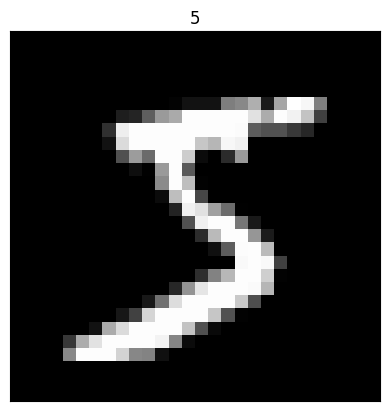

Pixel values:
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0 
  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0 
  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0 
  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   

In [8]:
# Display the first image in the dataset as a data matrix
plt.imshow(X_train[0], cmap="gray")
plt.title(y_train[0])
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()

# Display the values of each pixel in the image
print("Pixel values:")
for row in X_train[0]:
    for pixel in row:
        # print("{:3}".format(pixel), end=" ")
        print(f"{pixel:3}", end=" ") # :3 formats the pixel value to be 3 characters wide
    print()

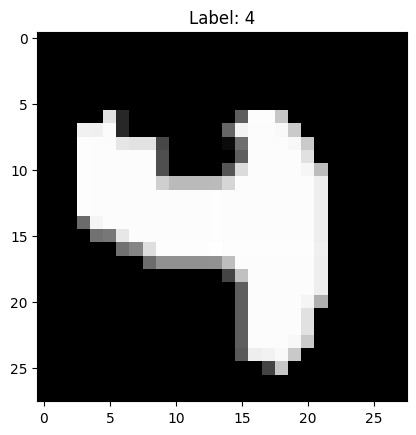

In [9]:
# display only 1 random image from the dataset
import random
random_index = random.randint(0, len(X_train) - 1)
plt.imshow(X_train[random_index], cmap="gray")
plt.title(f"Label: {y_train[random_index]}")
# plt.xticks([])
# plt.yticks([])
# plt.axis(False) # instead of "plt.xticks([])" and "plt.yticks([])"
# plt.grid(False)
plt.show()

In [10]:
# also need to change the data type to float32
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Normalize the data by dividing all values by maximum pixel value (255) - The pixel values are in the range of 0-255, so we divide by 255 to scale them to [0, 1].


Pixel values after normalization:
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.012 0.071 0.071 0.071 0.494 0.533 0.686 0.102 

<Figure size 640x480 with 0 Axes>

<Axes: >

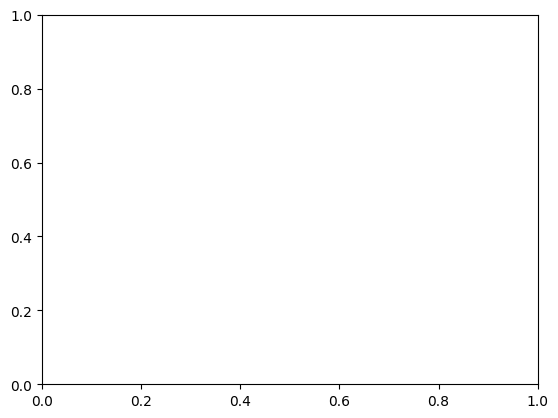

In [11]:
# Display the values of each pixel in the image after normalization
print("\nPixel values after normalization:")
for row in X_train[0]:
    for pixel in row:
        # print("{:0.3f}".format(pixel), end=" ")
        print(f"{pixel:0.3f}", end=" ") # :0.3f formats the pixel value to be a float with 3 decimal places
    print()
    
print('-------------------------------------------------------------')

# Display the complete output of the cell
display(plt.gcf())
display(plt.gca())

In [12]:
# Reshape the images to have a channel dimension - reshaping as we dont have 3rd value of image which is color channel
# we added 1 here because we already know that the images are black and white (grayscale), and not colored (RGB).
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1) # 28x28 pixels, 1 channel (grayscale)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# ## Another way to reshape:
# # reshape the data as we do not have 3rd value of an image
# X_train = X_train.reshape(X_train.shape+(1,))
# X_test = X_test.reshape(X_test.shape+(1,))

In [13]:
X_train.shape, X_test.shape

# number of features = 28 * 28 * 1 = 784 --> 1 is grayscale
# number of features = 28 * 28 * 3 = 2352 --> 3 is RGB -- if we had colored image

((60000, 28, 28, 1), (10000, 28, 28, 1))

# Build the model

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# create an input layer
input_layer = tf.keras.layers.Input(shape=(28, 28, 1)) # 28x28 pixel images with a single color channel

# CNN model building
model = tf.keras.Sequential([
    input_layer, # input layer
    layers.Conv2D(filters=10, # filter is the number of filters we want to apply
                  kernel_size=(3, 3), # kernel is the size of window/filter moving over the image
                  activation='relu',
                #   padding='same', # valid/same/full. valid is default. Most commonly used: valid and same --> padding means: adding 0 pixel layers outside of image. 'same' add 1 layer and 'full' add 2 layers.
                #   strides=2, # Steps kernal window takes to move - default is 1. Value 2 is same as someone is climbing stairs by 2 steps at a time.
                  ), # convolutional layer 
    layers.Conv2D(filters=10, kernel_size=(3, 3),  activation='relu'), # convolutional layer
    layers.MaxPooling2D(), # pooling layer
    
    layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'), # convolutional layer
    layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'), # convolutional layer
    layers.MaxPooling2D(), # pooling layer
    
    layers.Flatten(), # flatten layer
    layers.Dense(10, activation='softmax') # output layer - units(no. of neurons) are 10 because results are 10 classes (0-9 digits)
])

2025-09-21 21:21:53.495112: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 10)     │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 10, 10, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 10)       │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 10)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 160)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         1,610 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,440 (17.34 KB)

 Trainable params: 4,440 (17.34 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
#Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(), # loss function
              # SparseCategoricalCrossentropy is used when labels are integers - our labels are integers (0-9)
              # CategoricalCrossentropy is used when labels are one-hot encoded
              metrics=['accuracy'])

In [17]:
#train the model
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7229 - loss: 0.8224 - val_accuracy: 0.9489 - val_loss: 0.1670
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9595 - loss: 0.1321 - val_accuracy: 0.9705 - val_loss: 0.0965
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9681 - loss: 0.1005 - val_accuracy: 0.9745 - val_loss: 0.0893
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9758 - loss: 0.0759 - val_accuracy: 0.9782 - val_loss: 0.0717
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9786 - loss: 0.0700 - val_accuracy: 0.9812 - val_loss: 0.0616


In [18]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9780 - loss: 0.0662
Test Loss: 0.05349571630358696
Test Accuracy: 0.9825999736785889


In [19]:
# Save the model to be used later

# model.save('models_saved/model.h5')
model.save('models_saved/model.keras')

# **Assignment:** Take 10 Sticky notes and write with big board marker 0-9 digits, make their pictures, convert them into 28x28 in gray scale, and then use the trained model to predict the digits.

In [20]:
# grab an image from the test dataset
img = X_test[0]
print(img.shape)

(28, 28, 1)


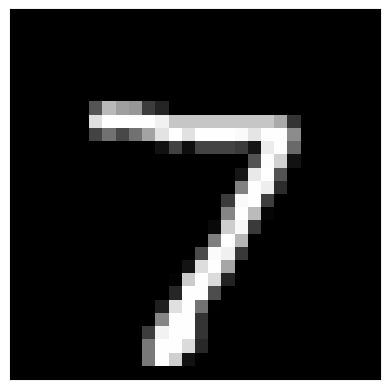

In [21]:
plt.imshow(img, cmap="gray")
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()

In [22]:
# predict the image
predictions = model.predict(img.reshape(1, 28, 28, 1))
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
[[1.5976537e-08 2.4203606e-08 7.7980876e-06 1.4765241e-05 4.3804669e-12
  1.7606291e-09 1.3686434e-15 9.9991608e-01 6.1095569e-08 6.1274040e-05]]


In [23]:
print(predictions[:,7])

[0.9999161]


In [24]:
print(f"The model predicts that this image is a {predictions.argmax()}.")

The model predicts that this image is a 7.


## Make prediction on test dataset

In [25]:
y_pred = model.predict(X_test).argmax(axis=1)
y_pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([7, 2, 1, ..., 4, 5, 6])

## Plot confusion matrix

Confusion matrix, without normalization
[[ 976    1    0    0    0    0    1    1    0    1]
 [   0 1131    1    1    0    1    1    0    0    0]
 [   2    3 1013    7    1    0    1    2    2    1]
 [   1    0    2  993    0    7    0    2    3    2]
 [   1    1    1    0  965    0    1    0    0   13]
 [   2    0    0    3    0  881    1    1    1    3]
 [   7    4    1    2    1    3  938    0    2    0]
 [   0    6   11    6    0    1    0 1000    1    3]
 [   9    1    2    3    0    3    2    3  947    4]
 [   5    6    2    3    3    3    0    3    2  982]]


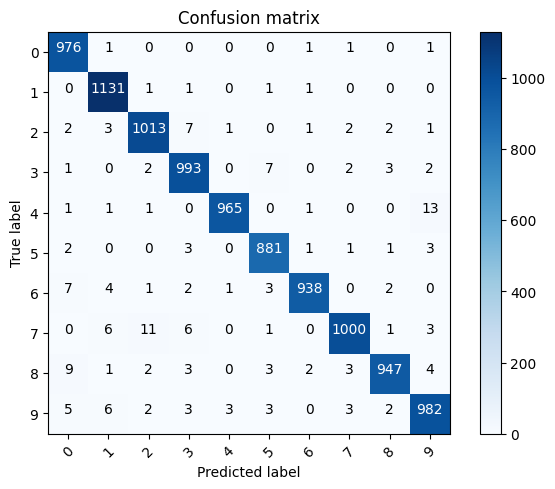

In [26]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, list(range(10)))

# Do these results make sense?
# It's easy to confuse 4 <--> 9, 3 <--> 5, 2 <--> 7, etc. 

## Simple way to plot Confusion matrix

[[ 976    1    0    0    0    0    1    1    0    1]
 [   0 1131    1    1    0    1    1    0    0    0]
 [   2    3 1013    7    1    0    1    2    2    1]
 [   1    0    2  993    0    7    0    2    3    2]
 [   1    1    1    0  965    0    1    0    0   13]
 [   2    0    0    3    0  881    1    1    1    3]
 [   7    4    1    2    1    3  938    0    2    0]
 [   0    6   11    6    0    1    0 1000    1    3]
 [   9    1    2    3    0    3    2    3  947    4]
 [   5    6    2    3    3    3    0    3    2  982]]


Text(50.722222222222214, 0.5, 'Actual')

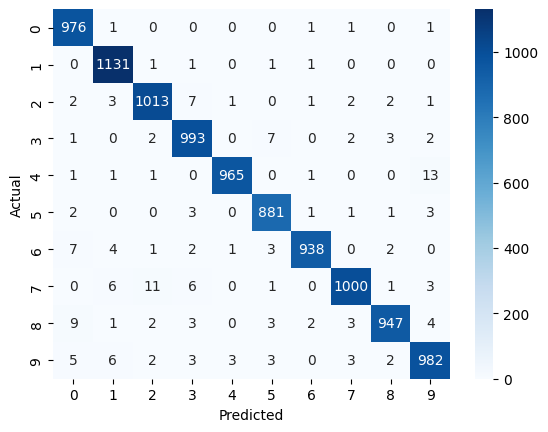

In [27]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

# plot the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), cmap=plt.cm.Blues, annot=True, fmt='d') # fmt means format of the annotation and d represents integer
plt.xlabel('Predicted')
plt.ylabel('Actual')

## Show misclassified examples

Text(0.5, 1.0, 'True label: 8 Predicted: 9')

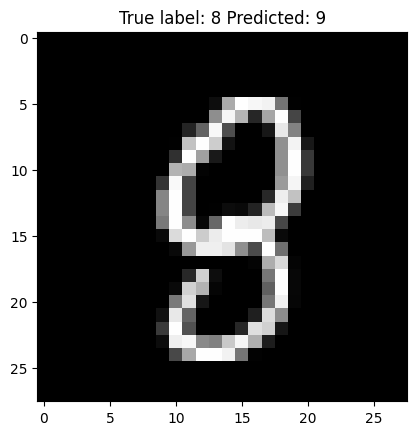

In [28]:
misclassified_idx = np.where(y_pred != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], y_pred[i]))

# **Assignment:** Write a function to name the labels of predicted images!